<a href="https://colab.research.google.com/github/davidklhui/stochastic-modelling/blob/main/Slot_design_using_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

author: David K.L. Hui

This project will discuss different approach to model slot game mathematics using the concept of Markov Chains.

# Section 1: Introduction

## 1.1: Background

In previous projects, we discussed the mathematics of 3x3 and 5x3 slot game design including simulations; finding feasible solutions using hit frequency and RTP; payout allocations; and probability calculations.

In these projects, the main assumption is that, we assume that the outcomes of the reels are completely independent between game. This is useful when designing basic game as there will not have a dependencies between game.

However, in many modern casino, the slot machine itself has its own internal mechanism. For example, make consecutive large prize and medium prize be impossible.

To control this kind of prize behavior, very basic if-then-else flow control programming is capable of achieve this. Another possible way is to use Markov Chains. Using Markov Chains, we can easily visualize the transition of different states (using state-space diagram, or simply the transition probability matrix), the probability of transitions, as well as the limiting distributions.

It is worth to note that, all key concepts we have used like Hit Frequency and RTP are still applicable, although the calculation may be a bit differs.

## 1.2: Stochastic Processes

Stochastic Processes is a sequence of random variables over time. We usually classify a stochasic process using **state** and **stage**.

1. State: the states of the process is the possible value of the random variables. e.g.: non-negative integers for a queue; +1 / 0/ -1 to represent win/draw/loss of a game;

2. Stage: also the time, which is the time the random variables are collected. e.g: discrete time (n), or continuous time (t)

Stochasic Processes is a extremely broad class in probability theory. In our project, we will use a specific type called Markov Chains, a discrete time - discrete states stochasic processes with **Markov property**.

## 1.3: Markov Chains

One important property of a Markov Chains and all kind of Markov processes, are the property called **Markov property**.

The Markov Property is a memoryless property of a process, which means that if we know the present state of the process, then the future states are independent of the past history.

Mathematically, the Markov property stated that, given the present state $X_n$, the state of the future state $X_{n+1}, X_{n+2}, ...$ is independent of the past $X_{n-1}, X_{n-2}, ...$, i.e.

$$
P(X_{n+1}=j | X_n = i, X_{n-1} = i_{n-1}, X_{n-2} = i_{n-2}, ....) = P(X_{n+1}=j | X_n = i) \ \forall i,j,n
$$

In general, we needs either the **State-Space Diagram** or the **Transition Probability Matrix** to represents a Markov Chains. In this project, we will simply use the transition probability matrix, **P**, where its rows represent the current state, columns represent the next state, and the element $p_{i,j}$ represents the transition probability moving from state i to state j, i.e.

$$
p_{i,j} = P(X_{n+1} = j | X_n = i) \ \forall i,j
$$


## 1.4: Limiting Distribution

One important concept of a stochastic process is the long run behavior. For specific Markov Chains, we can derive its limiting distribution (also known as stationary distribution).

For the randomness property of a stochastic process, it is impossible to know the exact state of process (unless for specific class of chains like periodic, or reached the absorption states). However, if the limiting distribution exists, we can know that, the proportion of time the process is in specific state regardless of the initial state.

This concept is particular useful for us to define the Hit frequency and RTP because
1. we know on average the proportion of time in different states, especially in the state of not winning, so we can calculate the hit frequency
2. similar, we know how often it is in different prize state, so we can calculate the RTP as well


To calculate the limiting distribution, we can use the famous relationship

$$
\pi = \pi P
$$

where $\pi$ is the limiting distribution in row vector, $P$ is the transition probability matrix


# Section 2: Modeling Examples

The above are just a tip of the area of Markov Chains and Stochastic Processes. There are many wonderful application area that may be useful for iGaming industry.

In this project, we will consider to model the game with the followings:
1. Classify the results into at least 4 states: Not win (0); Small Prize (1); Medium Prize (2); Large Prize (3); where for those who just got medium and large prize cannot get large prize in their immediate next stage
2. Homogeneous Markov Chains: the transition probability is time-invariant, i.e. independent of the stage.
3. Markov Property holds: given the latest state is enough to tell the transition probability, regardless of the past
4. Limiting Distribution exists: as we mentioned, limiting distribution exists only for specific conditions holds. However, it is no harm to assume it exists, if not, try use another transition probability matrix.


## 2.1: Example

Here we provide a very basic setup:

Step1: Define a transition probability matrix <br/>
Step2: find the limiting distribution through eigen problem (eigenvector with eigenvalue = 1) <br/>
Step3: find Prob(win) <br/>
Step4: distribute the payout according to the probability, and calculate the RTP

In [ ]:
import numpy as np

In [ ]:
P = np.array([[0.69, 0.205, 0.1, 0.005], [0.7, 0.2, 0.099, 0.001], [0.9, 0.09, 0.01, 0], [0.99, 0.01, 0, 0]])
P

array([[0.69 , 0.205, 0.1  , 0.005],
       [0.7  , 0.2  , 0.099, 0.001],
       [0.9  , 0.09 , 0.01 , 0.   ],
       [0.99 , 0.01 , 0.   , 0.   ]])

In [ ]:
## You may take a look, for a long run, the N-steps transition probability will become this
from numpy.linalg import matrix_power

p = matrix_power(P, 10000)
p

array([[0.71221088, 0.19281342, 0.09122183, 0.00375387],
       [0.71221088, 0.19281342, 0.09122183, 0.00375387],
       [0.71221088, 0.19281342, 0.09122183, 0.00375387],
       [0.71221088, 0.19281342, 0.09122183, 0.00375387]])

In [ ]:
# We can use solve the eigen equation to get the limiting distribution
# since it works only for column vector, so first we need to transpose the transition probability matrix
# then find the column vector associated with eigenvalue = 1
# finally, re-scale the eigenvector to sum = 1 (by default, it is of norm=1)

from numpy.linalg import eig

eigenvalues, eigenvectors = eig(np.transpose(P))

In [ ]:
eigenvalues

array([ 1.        , -0.10229626,  0.01652407, -0.01422782])

In [ ]:
eigenvectors

array([[ 0.95794711,  0.82418853,  0.68136944, -0.64133836],
       [ 0.2593404 , -0.45994563, -0.69796184,  0.70684662],
       [ 0.12269637, -0.32845472, -0.14734329, -0.24120953],
       [ 0.00504908, -0.03578818,  0.16393569,  0.17570126]])

In [ ]:
p = np.transpose(eigenvectors)[0]
p = p/sum(p)

p

array([0.71221088, 0.19281342, 0.09122183, 0.00375387])

In [ ]:
# perform further analysis
p0, p1, p2, p3 = p

In [ ]:
p0

0.7122108798046978

In [ ]:
p1, p2, p3

(0.19281341769910385, 0.09122183467947585, 0.0037538678167225933)

In [ ]:
# P(Win) = Hit frequency in the long run
1 - p0

0.28778912019530223

In [ ]:
# Suggested Payout
c = 10

r1 = c / 3 / p1
r2 = c / 3 / p2
r3 = c / 3 / p3


r1, r2, r3

(17.287870175794442, 36.54095913599626, 887.9730177189836)

In [ ]:
# define the payout for each prize in sensible values
r = [0, 15, 35, 1000]

In [ ]:
# expected payout
np.dot(r, p)

9.838833295990806

In [ ]:
def sim(N):
  traces = []

  latest_state = 0

  for i in range(N):
    x = np.random.choice(a=range(4), size=1, p=P[latest_state])[0]
    traces.append(x)
    latest_state = x

  return traces


N = 1000000
traces = sim(N)

In [ ]:
from collections import Counter

Counter(traces)

Counter({0: 711722, 2: 91130, 1: 193338, 3: 3810})

In [ ]:
# verify the proportion of states
[xx * N for xx in p]

[712210.8798046978, 192813.41769910385, 91221.83467947585, 3753.8678167225935]

In [ ]:
r

[0, 15, 35, 1000]

In [ ]:
# RTP
sum(list(map(lambda x: r[x], traces))) / (N*c)

0.989962

In [ ]:
# check longest 0:
longest = 0
run = 0
for i in traces:
#  print(f"{i}, {r[i+2]}")

  if r[i]==0:
    run += 1
  else:
    longest = max(longest, run)
    run = 0


# longest loss = 24
longest

38

## 2.2: Example 2

Suppose this time, we wish to add two more states to represent loss: -1, and -2. So, states {0, -1, -2} are the states representing a loss, but their transition to win is differernt, the more they loss, the transition probability to 1 (small prize), 2 (medium prize), 3 (large prize), will be larger slighly. What ever a win to loss will back to state 0 first.

In [ ]:
P = np.array([[0.6, 0, 0, 0.26, 0.135, 0.005],
              [0.65, 0, 0, 0.22, 0.125, 0.005],
              [0, 0.69, 0, 0.205, 0.1, 0.005],
              [0, 0, 0.7, 0.2, 0.099, 0.001],
              [0, 0, 0.9, 0.09, 0.01, 0],
              [0, 0, 0.99, 0.01, 0, 0]])
P

array([[0.6  , 0.   , 0.   , 0.26 , 0.135, 0.005],
       [0.65 , 0.   , 0.   , 0.22 , 0.125, 0.005],
       [0.   , 0.69 , 0.   , 0.205, 0.1  , 0.005],
       [0.   , 0.   , 0.7  , 0.2  , 0.099, 0.001],
       [0.   , 0.   , 0.9  , 0.09 , 0.01 , 0.   ],
       [0.   , 0.   , 0.99 , 0.01 , 0.   , 0.   ]])

In [ ]:
[sum(x) for x in P]

[1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0]

In [ ]:
## You may take a look, for a long run, the N-steps transition probability will become this
from numpy.linalg import matrix_power

p = matrix_power(P, 10000)
p

array([[0.27269918, 0.16781488, 0.24320997, 0.20882443, 0.1038241 ,
        0.00362744],
       [0.27269918, 0.16781488, 0.24320997, 0.20882443, 0.1038241 ,
        0.00362744],
       [0.27269918, 0.16781488, 0.24320997, 0.20882443, 0.1038241 ,
        0.00362744],
       [0.27269918, 0.16781488, 0.24320997, 0.20882443, 0.1038241 ,
        0.00362744],
       [0.27269918, 0.16781488, 0.24320997, 0.20882443, 0.1038241 ,
        0.00362744],
       [0.27269918, 0.16781488, 0.24320997, 0.20882443, 0.1038241 ,
        0.00362744]])

In [ ]:
# We can use solve the eigen equation to get the limiting distribution
# since it works only for column vector, so first we need to transpose the transition probability matrix
# then find the column vector associated with eigenvalue = 1
# finally, re-scale the eigenvector to sum = 1 (by default, it is of norm=1)

from numpy.linalg import eig

eigenvalues, eigenvectors = eig(np.transpose(P))

In [ ]:
eigenvalues

array([ 1.00000000e+00+0.j        ,  5.46320879e-02+0.29808585j,
        5.46320879e-02-0.29808585j, -2.53918219e-01+0.j        ,
       -4.58939655e-02+0.j        ,  5.48008700e-04+0.j        ])

In [ ]:
eigenvectors

array([[-5.86649279e-01+0.j        , -6.88614914e-01+0.j        ,
        -6.88614914e-01-0.j        ,  5.79021741e-01+0.j        ,
         6.82606339e-01+0.j        ,  6.86162374e-01+0.j        ],
       [-3.61014941e-01+0.j        ,  5.77766889e-01-0.3157944j ,
         5.77766889e-01+0.3157944j , -7.60672637e-01+0.j        ,
        -6.78294331e-01+0.j        , -6.32802156e-01+0.j        ],
       [-5.23210059e-01+0.j        ,  1.82171674e-01+0.22459656j,
         1.82171674e-01-0.22459656j,  2.79925567e-01+0.j        ,
         4.51153864e-02+0.j        , -5.02581285e-04+0.j        ],
       [-4.49237525e-01+0.j        , -3.64411264e-02+0.0769563j ,
        -3.64411264e-02-0.0769563j , -8.75606601e-02+0.j        ,
        -2.12411149e-01+0.j        , -1.16505619e-01+0.j        ],
       [-2.23353577e-01+0.j        , -3.38427512e-02+0.01550622j,
        -3.38427512e-02-0.01550622j, -9.12368538e-03+0.j        ,
         1.63740408e-01+0.j        , -2.06023948e-01+0.j        ],
     

In [ ]:
p = np.transpose(eigenvectors)[0].real
p = p/sum(p)

p

array([0.27269918, 0.16781488, 0.24320997, 0.20882443, 0.1038241 ,
       0.00362744])

In [ ]:
# perform further analysis
pm2, pm1, p0, p1, p2, p3 = p

In [ ]:
# P(Win) = Hit frequency in the long run
p1+p2+p3

0.31627598117000605

In [ ]:
# Suggested Payout
c = 10

r1 = c / 3 / p1
r2 = c / 3 / p2
r3 = c / 3 / p3


r1, r2, r3

(15.962372328758876, 32.10558223990266, 918.9205539589251)

In [ ]:
# define the payout for each prize in sensible values
r = [0, 0, 0, 15, 30, 1000]

In [ ]:
# expected payout
np.dot(r, p)

9.874534146865146

In [ ]:
def sim(N):
  traces = []

  latest_state = 0

  for i in range(N):
    x = np.random.choice(a=[-2,-1,0,1,2,3], size=1, p=P[latest_state+2])[0]
    traces.append(x)
    latest_state = x

  return traces


N = 1000000
traces = sim(N)

In [ ]:
from collections import Counter

Counter(traces)

Counter({1: 208498, 0: 242872, 2: 103920, -1: 167645, -2: 273453, 3: 3612})

In [ ]:
# verify the proportion of states
[xx * N for xx in p]

[272699.1751402867,
 167814.87700940706,
 243209.9666803001,
 208824.43190024942,
 103824.10474370638,
 3627.4445260502143]

In [ ]:
r

[0, 0, 0, 15, 30, 1000]

In [ ]:
# RTP
sum(list(map(lambda x: r[x+2], traces))) / (N*c)

0.985707

In [ ]:
# check longest 0:
longest = 0
run = 0
for i in traces:
#  print(f"{i}, {r[i+2]}")

  if r[i+2]==0:
    run += 1
  else:
    longest = max(longest, run)
    run = 0


# longest straight losses
longest


30

## 2.3: Discussion

From these 2 examples, we can see that we can define different states of win and loss (including consecutive losses like in subsection 2.2). In general, we can define as many states as we wish. The major challenges of this method are:

1. How to determine the transition probability between states
2. How to achieve the desire limiting distribution

Because in this Markov Chains construction, unlike the previous projects we can apply Dirichlet Distribution to simulate the probability of occurrence of different symbols, there are far more restrictions to apply Dirichlet Distribution than before:
1. some state is inaccessible from specific state (like state 3 cannot reach states {-1,-2} directly)
2. probability to reach state 3 must be the lowest, then 2 and 1
3. for states {-2,-1} have a slighly larger probability to reach states {1,2,3}

Hence, we need to develop another method to reconstruct the transition probability matrix given the desired limiting distribution

# Section 3: Reconstruction of transition probability matrix

In this section, we will introduce a method to reconstruct a transition probability matrix $P$ given a desired limiting distribution $\pi$ of any finite states

## 3.1: Mathematics Background

Recall from Section 1.4, if the limiting distribution $\pi$ of a Markov Chain exists, then it must satisfy

$$
\pi = \pi P
$$

Where $K$ be the number of states, with
\begin{align}
\displaystyle\sum_{i=1}^K \pi_i &= 1 \\
\displaystyle\sum_{j=1}^K P_{i,j} &= 1 \ \forall i
\end{align}

Here we assume $\pi$ is known, while $P$ is an unknown square matrix.

To find a sensible $P$, we can convert this problem into a optimization problem, and try to find a "good" solution of $P$ satisfying all relationships





### 3.1.1: Optimization Problem

Because the equations $\pi = \pi P$ must be satisfied, we can define the following objective function, using similar concept like the sum of square deviation between $\pi$ and $\pi P$:

$$
f(p) = \displaystyle\sum_{j=1}^K (\pi_j - \sum_{i=1}^K \pi_i P_{i,j})^2
$$

where $p$ is vector of all $i,j$ entries of $P$.

So the **optimization problem** becomes:

\begin{align}
\text{minimize} \ & f(p) = \displaystyle\sum_{j=1}^K (\pi_j - \sum_{i=1}^K \pi_i P_{i,j})^2\\
\text{subject to} \ & \displaystyle \sum_{j=1}^K P_{i,j} = 1 \ \forall i = 1,2,...,K
\end{align}

And the solution of this optimization problem

$$
p^* = \underset{p}{\mathrm{argmin}} f(p)
$$

The rationale of this method is because:
1. $f(p) \ge 0$
2. We wish to solve $f(p) = 0$

What we can do is either solve the equations by hand (treat it is system of linear equations, see Appendix A), or by optimization problem using computer.

However, solving the system of equations may be tedious, we can see this results in Appendix A, the only simple calculation is 2-states. For 3 / 4-states systems (or even more), the derivation is tedious, and potential issues may occur (not just typo or human errors, see **A.3: Four-states solutions** for more details).


Also, if we need to put somewhat more constraints (e.g. some entries must be greater than the others), stating all equations one by one may be time consuming.
So, converting the question into a optimization problem help easing many steps.

p.s.1: The solution of this optimization problem is not unique. But if we have more and more constraints, the size of feasible solutions may be decreased a lot.

p.s.2: We should note that, there is a obvious solution of $P$, which is an identity matrix. However, if we have slightly more constraints (like we know some entries, or specific relationship orders say, some probability must be greater than another), then the the solution of identity matrix will not be obtained








## 3.2: Scipy for optimization problem example

### 3.2.1: Example 1 revisit

In [12]:
import numpy as np
from scipy.optimize import minimize

# Given the limiting distribution from Example 2.1
pi = np.array([0.71221088, 0.19281342, 0.09122183, 0.00375387])
n = len(pi)

# small tolerance
epsilon = 1e-6

# Objective function
def objective(P):
    P = P.reshape((n, n))
    deviation = 0
    for j in range(n):
        deviation += (pi[j] - np.dot(pi, P[:, j]))**2
    return deviation

# Constraints: each row sums to 1
def row_sum_constraint(P):
    P = P.reshape((n, n))
    return np.sum(P, axis=1) - 1



# Known value entries constraints
def known_value_entries_constraint(P):
    P = P.reshape((n, n))
    constraints = [
        P[2, 3],
        P[3, 2],
        P[3, 3],
        P[3, 1] - 0.01
    ]
    return constraints



# Known zero entries constraints
def inequality_entries_constraint(P):
    P = P.reshape((n, n))
    constraints = [
        P[0, 0] - P[0, 1] - epsilon,
        P[0, 1] - P[0, 2] - epsilon,
        P[0, 2] - P[0, 3] - epsilon,
        P[1, 0] - P[1, 1] - epsilon,
        P[1, 1] - P[1, 2] - epsilon,
        P[1, 2] - P[1, 3] - epsilon,
        P[3, 0] - P[3, 1] - epsilon,
        P[3, 1] - P[3, 2] - epsilon,

        P[3, 0] - P[2, 0] - epsilon,
        P[2, 0] - P[1, 0] - epsilon,
        P[1, 0] - P[0, 0] - epsilon,
        P[0, 1] - P[1, 1] - epsilon,
        P[1, 1] - 2*P[2, 1] - epsilon,
        P[2, 1] - P[3, 1] - epsilon,
        P[0, 2] - P[1, 2] - epsilon,
        P[1, 2] - 10*P[2, 2] - epsilon,
        P[0, 3] - 5* P[1, 3] - epsilon
    ]
    return constraints


# Non-negativity constraint
bounds = [(0, 1) for _ in range(n*n)]

# Initial guess for P
P0 = np.ones((n, n)) / n

# Formulate and solve the optimization problem
# the constraints with making zero entries must be the first constraint
constraints = [
    {'type': 'eq', 'fun': known_value_entries_constraint},
    {'type': 'ineq', 'fun': inequality_entries_constraint},
    {'type': 'eq', 'fun': row_sum_constraint},



]

result = minimize(objective, P0.flatten(), bounds=bounds, constraints=constraints)

# Reshape the solution back to matrix form
P_optimal = result.x.reshape((n, n))


np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)
print("Optimized Transition Matrix P:")
print(P_optimal)


Optimized Transition Matrix P:
[[0.69197604 0.20294852 0.10001034 0.0050651 ]
 [0.69629861 0.20278411 0.09994214 0.00097514]
 [0.8923363  0.09981673 0.00784697 0.        ]
 [0.99       0.01       0.         0.        ]]


From the above, we have put 4 equality constraints, with some inequality constraints (to confirm the strict ordering of the probabilities, with 3 have explicitly stated the multiple). Then, we obtained a optimal solution which is highly close to the real matrix $P$:



In [13]:
P = np.array([[0.69, 0.205, 0.1, 0.005], [0.7, 0.2, 0.099, 0.001], [0.9, 0.09, 0.01, 0], [0.99, 0.01, 0, 0]])
P

array([[0.69 , 0.205, 0.1  , 0.005],
       [0.7  , 0.2  , 0.099, 0.001],
       [0.9  , 0.09 , 0.01 , 0.   ],
       [0.99 , 0.01 , 0.   , 0.   ]])

To verify their closeness, and the validity of the optimal solution:

In [14]:
from numpy.linalg import matrix_power

# for lazyiness, just use power instead of finding the exact limiting distribution
pp = matrix_power(P_optimal, 10000000)[0]
print(f"found solution: {pp}")
print(f"required solution: {pi}")


print(f"diff in norm: {np.linalg.norm(pp-pi)}")

found solution: [0.71221558 0.19277772 0.09121127 0.00379543]
required solution: [0.71221088 0.19281342 0.09122183 0.00375387]
diff in norm: 5.599075522185434e-05


Hence, we can reconstruct the transition probability matrix, under the desired limiting distribution, and some requied constraints (including exact value, or simply the ordering)

### 3.2.2: Example 2 revisit

In [15]:
import numpy as np
from scipy.optimize import minimize

# Given stationary distribution
pi2 = np.array([0.27269918, 0.16781488, 0.24320997, 0.20882443, 0.1038241, 0.00362744])
n = len(pi2)

# small tolerance
epsilon = 1e-6

# Objective function
def objective(P):
    P = P.reshape((n, n))
    deviation = 0
    for j in range(n):
        deviation += (pi2[j] - np.dot(pi2, P[:, j]))**2
    return deviation

# Constraints: each row sums to 1
def row_sum_constraint(P):
    P = P.reshape((n, n))
    return np.sum(P, axis=1) - 1



# Known value entries constraints
def known_value_entries_constraint(P):
    P = P.reshape((n, n))
    constraints = [
        P[0, 1],  # P_12 = 0
        P[0, 2],  # P_13 = 0
        P[1, 1],  # P_22 = 0
        P[1, 2],  # P_23 = 0
        P[2, 0],  # P_31 = 0
        P[2, 2],  # P_33 = 0
        P[3, 0],  # P_41 = 0
        P[3, 1],  # P_42 = 0
        P[4, 0],  # P_51 = 0
        P[4, 1],  # P_52 = 0
        P[4, 5],  # P_56 = 0
        P[5, 0],  # P_61 = 0
        P[5, 1],  # P_62 = 0
        P[5, 4],  # P_65 = 0
        P[5, 5],  # P_66 = 0
        P[0, 5] - 0.005,  # P_16 = 0.005
        P[1, 5] - 0.005,  # P_26 = 0.005
        P[2, 5] - 0.005,  # P_36 = 0.005
        P[3, 5] - 0.001,  # P_46 = 0.001
        P[5, 2] - 0.99,  # P_63 = 0.99
    ]
    return constraints



# Known zero entries constraints
def inequality_entries_constraint(P):
    P = P.reshape((n, n))
    constraints = [
      P[1, 0] - P[0, 0] - epsilon, # P_21 > P_11
      P[0, 3] - P[1, 3] - epsilon, # P_14 > P_24
      P[0, 4] - P[1, 4] - epsilon, # P_15 > P_25
      P[1, 3] - P[2, 3] - epsilon, # P_24 > P_34
      P[1, 4] - P[2, 4] - epsilon, # P_25 > P_35
      P[4, 2] - P[3, 2] - epsilon, # P_53 > P_43
      P[3, 3] - 2*P[4, 3] - epsilon, # P_44 > 2*P_54
      P[3, 4] - 1.1*P[4, 4] - epsilon # P_45 > 2*P_55
    ]
    return constraints


# Non-negativity constraint
bounds = [(0, 1) for _ in range(n*n)]

# Initial guess for P
P0 = np.ones((n, n)) / n

# Formulate and solve the optimization problem
# the constraints with making zero entries must be the first constraint
constraints = [
    {'type': 'eq', 'fun': known_value_entries_constraint},
    {'type': 'ineq', 'fun': inequality_entries_constraint},
    {'type': 'eq', 'fun': row_sum_constraint},



]

result = minimize(objective, P0.flatten(), bounds=bounds, constraints=constraints)

# Reshape the solution back to matrix form
P_optimal = result.x.reshape((n, n))

print("Optimized Transition Matrix P:")
print(P_optimal)


Optimized Transition Matrix P:
[[0.60116626 0.         0.         0.26769527 0.12613847 0.005     ]
 [0.6485291  0.         0.         0.24542286 0.10104804 0.005     ]
 [0.         0.68960292 0.         0.22096668 0.08443039 0.005     ]
 [0.         0.         0.73668965 0.15727119 0.10503916 0.001     ]
 [0.         0.         0.82587567 0.0786351  0.09548923 0.        ]
 [0.         0.         0.99       0.01       0.         0.        ]]


In [16]:
# true P
P = np.array([[0.6, 0, 0, 0.26, 0.135, 0.005],
              [0.65, 0, 0, 0.22, 0.125, 0.005],
              [0, 0.69, 0, 0.205, 0.1, 0.005],
              [0, 0, 0.7, 0.2, 0.099, 0.001],
              [0, 0, 0.9, 0.09, 0.01, 0],
              [0, 0, 0.99, 0.01, 0, 0]])
P

array([[0.6  , 0.   , 0.   , 0.26 , 0.135, 0.005],
       [0.65 , 0.   , 0.   , 0.22 , 0.125, 0.005],
       [0.   , 0.69 , 0.   , 0.205, 0.1  , 0.005],
       [0.   , 0.   , 0.7  , 0.2  , 0.099, 0.001],
       [0.   , 0.   , 0.9  , 0.09 , 0.01 , 0.   ],
       [0.   , 0.   , 0.99 , 0.01 , 0.   , 0.   ]])

In [17]:

# for lazyiness, just use power instead of finding the exact limiting distribution
pp = matrix_power(P_optimal, 10000000)[0]
print(f"found solution: {pp}")
print(f"required solution: {pi2}")


print(f"diff in norm: {np.linalg.norm(pp-pi2)}")

found solution: [0.27272562 0.16772135 0.24321439 0.20897134 0.10374002 0.00362728]
required solution: [0.27269918 0.16781488 0.24320997 0.20882443 0.1038241  0.00362744]
diff in norm: 0.00019523774579662263


# Section 4: Programming

In this section, we will first refactor the codes we have discussed in section 3; then go through another more realistic example; and finally, discuss the potential problems

## 4.1: Refactoring the codes

In [2]:
import numpy as np


from typing import final
from numpy.linalg import eig
from scipy.optimize import minimize


class Reconstruct_MC():
  def __init__(self, pi):
    self.pi = pi

    self.n = len(pi)


  def known_value_entries_constraint_definition(self, P):
    return []

  def inequality_entries_constraint_definition(self, P):
    return []

  @final
  def known_value_entries_constraint(self, P):
    P = P.reshape((self.n, self.n))
    constraints = self.known_value_entries_constraint_definition(P)
    return constraints

  @final
  def inequality_entries_constraint(self, P):
    epsilon = 1e-6

    P = P.reshape((self.n, self.n))

    constraints = self.inequality_entries_constraint_definition(P)

    constraints = [x - epsilon for x in constraints] # subtract epsilon to confirm strict inequality
    return constraints

  # Objective function
  @final
  def objective(self, P):
    P = P.reshape((self.n, self.n))
    deviation = 0
    for j in range(self.n):
        deviation += (self.pi[j] - np.dot(self.pi, P[:, j]))**2

    self.deviation = deviation
    return deviation

  # Constraints: each row sums to 1
  @final
  def row_sum_constraint(self, P):
      P = P.reshape((self.n, self.n))
      return np.sum(P, axis=1) - 1

  @final
  def solve(self):
    # Non-negativity constraint
    bounds = [(0, 1) for _ in range(self.n * self.n)]

    # Initial guess for P
    P0 = np.ones((self.n, self.n)) / self.n

    # Formulate and solve the optimization problem
    # the constraints with making zero entries must be the first constraint
    constraints = [
        {'type': 'eq', 'fun': self.known_value_entries_constraint},
        {'type': 'eq', 'fun': self.row_sum_constraint},
        {'type': 'ineq', 'fun': self.inequality_entries_constraint},

    ]

    result = minimize(self.objective, P0.flatten(), bounds=bounds, constraints=constraints)

    # Reshape the solution back to matrix form
    self.P_optimal = result.x.reshape((self.n, self.n))
    self.eigen()
    self.print_result()

  @final
  def eigen(self):
    eigenvalues, eigenvectors = eig(np.transpose(self.P_optimal))

    ind = np.where((eigenvalues - 1)**2 < 1e-6)[0][0]

    p = np.transpose(eigenvectors)[ind].real
    p = p/sum(p)

    self.pi_optimal = p

  @final
  def print_result(self):

    print(f"***************************")
    print(f"optimal solution: ")
    print(self.P_optimal)
    print(f"***************************")

    print(f"objective function value: {self.deviation}")

    print(f"given limiting distribution: {self.pi}")
    print(f"found limiting distribution under optimization: {self.pi_optimal}")

    print(f"norm of diff: {np.linalg.norm(self.pi_optimal - self.pi)}")

## 4.2: Example 3

In this example, we will define 8 states:
States {-3, -2, -1, 0} have no payouts (loss);
States {1, 2, 3, 4} are small prize 1, small prize 2, medium prize, and large prize.

We have a game settings:
1. game starts at state 0, and go to state -1 if a loss, -2 if another loss. And state -3 is the lowest reachable state.
2. after a win, if the player loss will go to state 0
3. the probability of getting a win is different from state to state; the probability of win generally increase for lower state

In [3]:
# example 3

pi3 = np.array([0.21, 0.11, 0.15, 0.23, 0.13, 0.11, 0.05, 0.01])

sum(pi3), sum(pi3[:4]), sum(pi3[4:])



(1.0, 0.7, 0.3)

In [4]:
# without adding any constraints
Reconstruct_MC(pi3).solve()


***************************
optimal solution: 
[[2.30956364e-01 1.02478333e-01 1.53869545e-01 2.56651971e-01
  1.28173939e-01 1.02478333e-01 2.53915143e-02 0.00000000e+00]
 [1.85977522e-01 1.18679506e-01 1.45598712e-01 1.99437124e-01
  1.32139108e-01 1.18679506e-01 7.83006960e-02 2.11878266e-02]
 [2.05785158e-01 1.14015136e-01 1.50723145e-01 2.24139163e-01
  1.32369141e-01 1.14015136e-01 5.89531221e-02 0.00000000e+00]
 [2.39346767e-01 9.86327318e-02 1.54918346e-01 2.67489573e-01
  1.26775539e-01 9.86327318e-02 1.42043113e-02 4.57397792e-20]
 [1.97064344e-01 1.17530325e-01 1.49343933e-01 2.12971148e-01
  1.33437129e-01 1.17530325e-01 6.98099133e-02 2.31288532e-03]
 [1.85977522e-01 1.18679506e-01 1.45598712e-01 1.99437125e-01
  1.32139108e-01 1.18679506e-01 7.83006960e-02 2.11878266e-02]
 [1.52717055e-01 1.22127048e-01 1.34363051e-01 1.58835056e-01
  1.28245050e-01 1.22127048e-01 1.03773044e-01 7.78126486e-02]
 [1.30543410e-01 1.24425410e-01 1.26872610e-01 1.31767011e-01
  1.25649010e-01

In [5]:
class Reconstruct_MC_eg3(Reconstruct_MC):
  def __init__(self, pi):
    super().__init__(pi)

  def known_value_entries_constraint_definition(self, P):
    return [
      P[0,1],P[0,2],P[0,3],
      P[1,1],P[1,2],P[1,3],
      P[2,0],P[2,2],P[2,3],
      P[3,0],P[3,1],P[3,3],
      P[4,0],P[4,1],P[4,2],
      P[5,0],P[5,1],P[5,2],
      P[6,0],P[6,1],P[6,2],P[6,6],P[6,7],
      P[7,0],P[7,1],P[7,2],P[7,6],P[7,7],


#      P[4,3] - 0.70,
#      P[5,3] - 0.75,
      P[6,3] - 0.85,
      P[7,3] - 0.95,

    ]

  def inequality_entries_constraint_definition(self, P):
    c = 0.8 # allow small available buffer
    return [

      # Row-wise inequalities
      P[0,4] - c*P[0,5], P[0,5] - c*P[0,6], P[0,6] - c*P[0,7],
      P[1,4] - c*P[1,5], P[1,5] - c*P[1,6], P[1,6] - c*P[1,7],
      P[2,4] - c*P[2,5], P[2,5] - c*P[2,6], P[2,6] - c*P[2,7],
      P[3,4] - c*P[3,5], P[3,5] - c*P[3,6], P[3,6] - c*P[3,7],

      P[4,3] - c*P[4,4], P[4,4] - c*P[4,5], P[4,5] - c*P[4,6], P[4,6] - c*P[4,7],
      P[5,3] - c*P[5,4], P[5,4] - c*P[5,5], P[5,5] - c*P[5,6], P[5,6] - c*P[5,7],
      P[6,3] - c*P[6,4], P[6,4] - c*P[6,5], P[6,5] - c*P[6,6],


      # Column-wise inequalities
      P[0,4] - c*P[1,4], P[1,4] - c*P[2,4], P[2,4] - c*P[3,4], P[3,4] - c*P[4,4], P[4,4] - c*P[5,4], P[5,4] - c*P[6,4], P[6,4] - c*P[7,4],
      P[0,5] - c*P[1,5], P[1,5] - c*P[2,5], P[2,5] - c*P[3,5], P[3,5] - c*P[4,5], P[4,5] - c*P[5,5], P[5,5] - c*P[6,5], P[6,5] - c*P[7,5],
      ## medium and large prize do not offer small available buffer
      P[0,6] - P[1,6], P[1,6] - P[2,6], P[2,6] - P[3,6], P[3,6] - P[4,6], P[4,6] - P[5,6], P[5,6] - P[6,6],
      P[0,7] - P[1,7], P[1,7] - P[2,7], P[2,7] - P[3,7], P[3,7] - P[4,7], P[4,7] - P[5,7],

      # inequalities for specific entries
      P[1,0] - P[0,0],
      P[2,1] - P[1,0],
      P[3,2] - P[2,1],
      P[4,3] - P[3,2],
      P[5,3] - P[4,3],
      P[6,3] - P[5,3],
      P[7,3] - P[6,3],

    ]


In [6]:
mc = Reconstruct_MC_eg3(pi3)
mc.solve()

***************************
optimal solution: 
[[6.49474616e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.41068216e-01 1.15201274e-01 7.54505280e-02 1.88053660e-02]
 [6.66260858e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.35812626e-01 1.22263280e-01 6.04288102e-02 1.52344246e-02]
 [0.00000000e+00 6.83552984e-01 0.00000000e+00 0.00000000e+00
  1.31585351e-01 1.13108975e-01 5.90354600e-02 1.27172301e-02]
 [0.00000000e+00 0.00000000e+00 6.83553984e-01 0.00000000e+00
  1.38548582e-01 1.10218124e-01 5.69628438e-02 1.07164657e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.40799154e-01
  1.24402894e-01 1.08390027e-01 2.64069242e-02 1.00000000e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.40800154e-01
  1.25565045e-01 1.12015699e-01 2.16191017e-02 2.16840434e-19]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.50000000e-01
  7.80793973e-02 7.19206027e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.50000000e-01
  2.56158796e-02

In [7]:
# get the limiting distribution under the optimized solution
pi_optimal = mc.pi_optimal
pi_optimal

array([0.20442373, 0.10754902, 0.15733824, 0.23017676, 0.13024508,
       0.11017254, 0.0501442 , 0.00995043])

In [8]:
cost = 10

payout = cost / 4 / pi_optimal[4:]
payout



array([ 19.19458304,  22.69167907,  49.85621555, 251.24545696])

In [9]:
payout = [0, 0, 0, 0, 20, 20, 50, 250]

# expected payout
np.dot(payout, pi_optimal)

9.803169592474298

In [10]:
# RTP
np.dot(payout, pi_optimal) / cost * 100

98.03169592474298

In [11]:

P_optimal = mc.P_optimal

def sim(N):
  traces = []

  latest_state = 0

  for i in range(N):
    x = np.random.choice(a=np.arange(-3, 5, 1), size=1, p=P_optimal[latest_state+3])[0]
    traces.append(x)
    latest_state = x

  return traces


N = 1000000
traces = sim(N)

In [12]:
from collections import Counter

print(Counter(traces))

# verify the proportion of states
[xx * N for xx in pi_optimal]

Counter({0: 230393, -3: 204172, -1: 157382, 1: 130289, 2: 110116, -2: 107441, 3: 50246, 4: 9961})


[204423.7256714703,
 107549.02389427205,
 157338.24055307053,
 230176.75873158823,
 130245.07981792213,
 110172.54353156297,
 50144.19912271915,
 9950.428677394548]

In [13]:
# Hit Frequency (or P(win))
sum([1 for t in traces if t > 0]) / N




0.300612

In [14]:
# RTP
payout_traces = list(map(lambda x: payout[x+3], traces))

sum(payout_traces) / (N*cost) * 100

98.1065

In [15]:
# check longest 0:
longest = 0
run = 0
for i in traces:
#  print(f"{i}, {r[i+2]}")

  if payout[i+3]==0:
    run += 1
  else:
    longest = max(longest, run)
    run = 0


# longest straight losses
longest


32

In [ ]:
# Suppose initially with credits 10 * cost, see the player's balance traces
initial_balance = 10 * cost

balance_traces = []

new = True
for ind in range(len(payout_traces)):
  if new:
    balance_trace = [initial_balance]
    new = not new

  latest_balance = balance_trace[-1]
  if latest_balance < cost:
    balance_traces.append(balance_trace)
    # print("appended")
    new = True

  else:
    pt = payout_traces[ind]
    balance_trace.append(latest_balance - cost + pt)




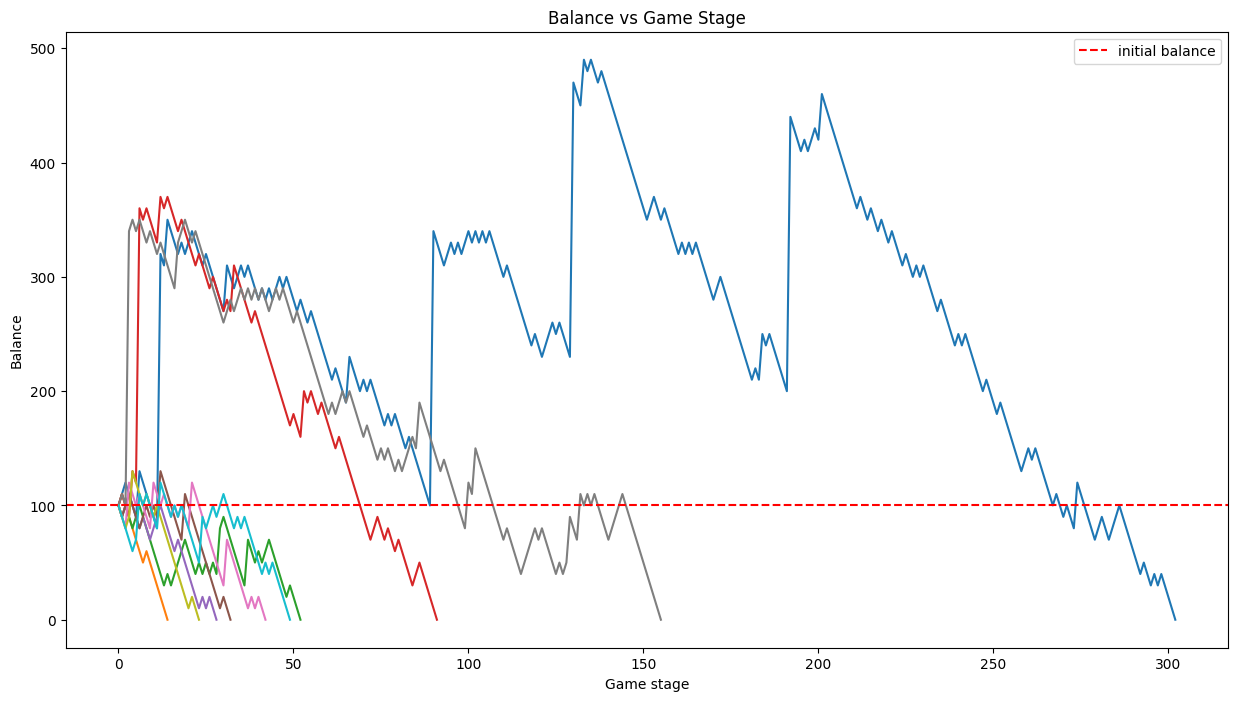

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

np.random.shuffle(balance_traces)


for bt in balance_traces[:10]:
  plt.plot(bt)

plt.title("Balance vs Game Stage")
plt.xlabel("Game stage")
plt.ylabel("Balance")

plt.axhline(y = initial_balance, color = 'r', linestyle = '--', label="initial balance")

plt.legend()
plt.show()


In [22]:
# number of samples
len(balance_traces)

2000

In [68]:

bal_len = [len(balance_trace)-1 for balance_trace in balance_traces]

x, CDF_counts = np.unique(bal_len, return_counts = True)
y = np.cumsum(CDF_counts)/np.sum(CDF_counts)

yy = np.arange(0, 1, 0.1)
xx = [x[np.where(y>yyy)[0][0]] for yyy in yy]



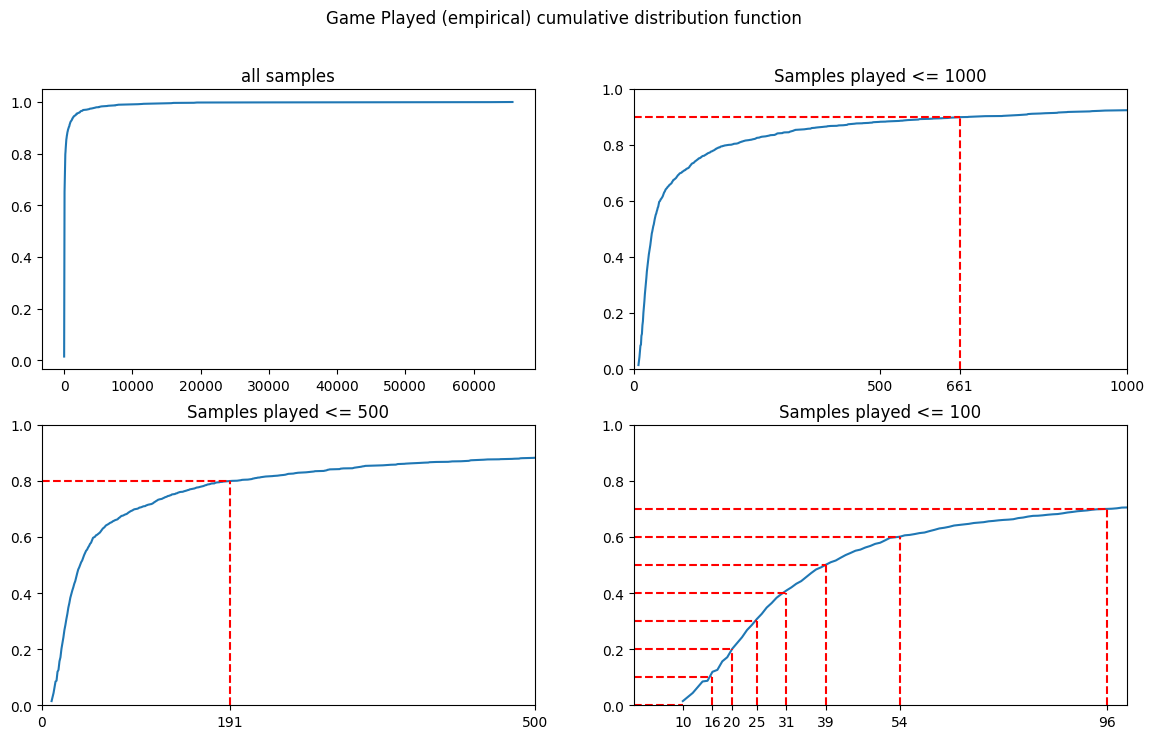

In [69]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,8))
fig.suptitle("Game Played (empirical) cumulative distribution function ")

ax1.plot(x,y)
ax1.title.set_text("all samples")

ax2.plot(x,y)
ax2.title.set_text("Samples played <= 1000")
ax2.set_xlim([0, 1000])
ax2.set_ylim([0, 1])


ax2_x_ticks = [0, 500, 1000]
for t in zip(xx,yy):
  if t[0]>500 and t[0] <= 1000:
    ax2.plot([t[0], t[0]], [0,t[1]], color="red", linestyle="--")
    ax2.plot([0, t[0]], [t[1],t[1]], color="red", linestyle="--")
    ax2_x_ticks.append(t[0])

ax2.set_xticks(ax2_x_ticks)


ax3.plot(x,y)
ax3.title.set_text("Samples played <= 500")

ax3_x_ticks = [0, 500]
for t in zip(xx,yy):
  if t[0]>100 and t[0] <= 500:
    ax3.plot([t[0], t[0]], [0,t[1]], color="red", linestyle="--")
    ax3.plot([0, t[0]], [t[1],t[1]], color="red", linestyle="--")
    ax3_x_ticks.append(t[0])

ax3.set_xticks(ax3_x_ticks)

ax3.set_xlim([0, 500])
ax3.set_ylim([0, 1])


ax4.plot(x,y)

ax4.title.set_text("Samples played <= 100")
ax4.set_xlim([0, 100])
ax4.set_ylim([0, 1])

ax4_x_ticks = []
for t in zip(xx,yy):
  if t[0]<=100:
    ax4.plot([t[0], t[0]], [0,t[1]], color="red", linestyle="--")
    ax4.plot([0, t[0]], [t[1],t[1]], color="red", linestyle="--")
    ax4_x_ticks.append(t[0])

ax4.set_xticks(ax4_x_ticks)


In [65]:
import pandas as pd


bal_len = [len(balance_trace)-1 for balance_trace in balance_traces]

x, CDF_counts = np.unique(bal_len, return_counts = True)
y = np.cumsum(CDF_counts)/np.sum(CDF_counts)

yy = np.arange(0, 1, 0.05)
xx = [x[np.where(y>yyy)[0][0]] for yyy in yy]



df = pd.DataFrame(columns=["Game Played below", "Percentage"])
for i in range(len(xx)):
  df.loc[i] = [xx[i],yy[i]]

df.loc[df.shape[0]] = [max(bal_len), 1.0]

df = df.astype({"Game Played below": int})
df

,Game Played below,Percentage
0,10,0.00
1,14,0.05
2,16,0.10
3,18,0.15
4,20,0.20
5,23,0.25
6,25,0.30
7,28,0.35
8,31,0.40
9,35,0.45


From the table, we can see that half of the samples played around 40 games to ruin; and 70% of the sample played below 100 games before ruined

## 4.3: Remark

To use this method to reconstruct the transition probability matrix, there are a few things need to be aware of:
1. There may have infinitely many solution that satisfied the given relationship. To avoid (or reduce the number of possible solutions), you need to put more constraints (and it is always preferable)
2. Need to review the found solution. The more states will are considering, the higher chance to occur large deviations.
3. The given limiting distribution may not achievable. For instance, if you make the limiting distibution is unrealistic for specific states (like if you put a high value for states {-2, -1}), it may end up with a large norm in difference.


In [95]:
# see an unachievable example
pi = np.array([0.3, 0.20, 0.10, 0.1, 0.12, 0.12, 0.05, 0.01])
print(f"{sum(pi)}, {sum(pi[:4])}, {sum(pi[4:])}")

Reconstruct_MC_eg3(pi).solve()

1.0, 0.7, 0.3
***************************
optimal solution: 
[[0.62717623 0.         0.         0.         0.12248033 0.12248034 0.07742668 0.05043642]
 [0.62717723 0.         0.         0.         0.13744881 0.1374488  0.06952937 0.02839578]
 [0.         0.62717823 0.         0.         0.15092048 0.15092048 0.0624217  0.00855911]
 [0.         0.         0.62717923 0.         0.15092098 0.15092098 0.0624207  0.00855811]
 [0.         0.         0.         0.62718023 0.15092148 0.15092148 0.0624197  0.00855711]
 [0.         0.         0.         0.62718123 0.15092198 0.15092198 0.0624187  0.00855611]
 [0.         0.         0.         0.85       0.075      0.075      0.         0.        ]
 [0.         0.         0.         0.95       0.025      0.025      0.         0.        ]]
***************************
objective function value: 0.03178621270788095
given limiting distribution: [0.3  0.2  0.1  0.1  0.12 0.12 0.05 0.01]
found limiting distribution under optimization: [0.15937095 0.094

# Section 5: Conclusion

In this project, we discussed the general methodlogy to construct a transition probability matrix of a Markov Chain by desirable limiting distribution (stationary distribution), where some states means for zero payout, and some representing prize level (small / medium / large).

Also, we discussed the strength and potential problem when using this approach.

# Appendix

## A: Solutions of linear systems

### A.1: Two-states

This section show that given a 2 states limiting distribution, there are infinitely many solutions

Suppose that $\pi = (\pi_1, \pi_2)$ is the given limiting distbribution, where $\pi_1 + \pi_2 = 1$.

Let the transition probability matrix $P = [p]_{i,j}$, where
\begin{align}
p_{1,1} + p_{1,2} &= 1 \tag{1} \\
p_{2,1} + p_{2,2} &= 1 \tag{2}
\end{align}

Also, to satisfy the equation $\pi = \pi P$, we have the followings:
\begin{align}
\pi_1 &= \pi_1 p_{1,1} + \pi_2 p_{2,1} \tag{3} \\
\pi_2 &= \pi_1 p_{1,2} + \pi_2 p_{2,2} \tag{4}
\end{align}

Note that, although there are 4 linear equations, one of them can be generated using the rest 3 (i.e. the matrix of coefficients is not full rank).


From $(1)$, let
$$p_{1,1} = s \in (0,1) \tag{5}$$ then
$$p_{1,2} = 1 - s \tag{6}$$

Substitute $(5)$ into $(3)$:
\begin{align}
\pi_1 &= \pi_1 s + \pi_2 p_{2,1} \\
p_{2,1} &= \frac{(1-s)\pi_1}{\pi_2} \tag{7}
\end{align}

Substitute $(7)$ into $(2)$:
\begin{align}
\frac{(1-s)\pi_1}{\pi_2} + p_{2,2} &= 1 \\
p_{2,2} &= \frac{\pi_2 - (1-s)\pi_1}{\pi_2}
\end{align}

Hence, the transition probability matrix $P$ given the limiting distribution is:

\begin{equation}
P =
\begin{bmatrix}
s & 1-s \\
\frac{(1-s)\pi_1}{\pi_2} & \frac{\pi_2 - (1-s)\pi_1}{\pi_2}
\end{bmatrix}
\end{equation}









Where all entries should satisfy $\in (0,1)$ and row sum up to 1

In [ ]:
# Example:

import numpy.linalg as LA

pi1 = 123/456
pi2 = 1 - pi1
pi = [pi1, pi2]


trials = 0
while trials < 100000:
  s = np.random.uniform()
  # print(f"s={s}")

  p11 = s
  p12 = 1-s
  p21 = (1-s)*pi1/pi2
  p22 = (pi2 - (1-s)*pi1)/pi2


  if p21 > 0 and p22 > 0 and p21 < 1 and p22 < 1:
    print(f"trials={trials}")
    break;

  trials += 1

P = [[p11, p12], [p21, p22]]

print(P)

p = LA.matrix_power(P, 10000)[0]
p

# run for different s, the solution will almost the same
print(f"pi={pi}, found P's limiting distribution={p} \n, norm of diff = {LA.norm(pi-p)}")


trials=0
[[0.15222969252722796, 0.847770307472772], [0.3131403838412942, 0.6868596161587058]]
pi=[0.26973684210526316, 0.7302631578947368], found P's limiting distribution=[0.26973684 0.73026316] 
, norm of diff = 5.963287869088852e-13


However, if any one of the entry is determined, then the values of the whole matrix are determined.

### A.2: Three-states

This section show that given a 3 states limiting distribution, there are infinitely many solutions

Suppose that $\pi = (\pi_1, \pi_2, \pi_3)$ is the given limiting distbribution, where $\pi_1 + \pi_2 + \pi_3 = 1$.

Let the transition probability matrix $P = [p]_{i,j}$, where
\begin{align}
p_{1,1} + p_{1,2} + p_{1,3} &= 1 \tag{1} \\
p_{2,1} + p_{2,2} + p_{2,3} &= 1 \tag{2} \\
p_{3,1} + p_{3,2} + p_{3,3} &= 1 \tag{3}
\end{align}

Also, to satisfy the equation $\pi = \pi P$, we have the followings:
\begin{align}
\pi_1 &= \pi_1 p_{1,1} + \pi_2 p_{2,1} + \pi_3 p_{3,1} \tag{4} \\
\pi_2 &= \pi_1 p_{1,2} + \pi_2 p_{2,2} + \pi_3 p_{3,2} \tag{5} \\
\pi_3 &= \pi_1 p_{1,3} + \pi_2 p_{2,3} + \pi_3 p_{3,3} \tag{6}
\end{align}

There are 9 variables, but there are 6 equations on hand (and among these 6 equations, some may be derived from the row operations of the others)

From $(1)$, let
\begin{align}
p_{1,1} &= s \in (0,1) \tag{7} \\
p_{1,2} &= t \in (0,1) \ and \ s+t \lt 1 \tag{8}
\end{align}
then
$$p_{1,3} = 1 - s - t \tag{9}$$

From $(2)$, let
\begin{align}
p_{2,1} &= u \in (0,1) \tag{10} \\
p_{2,2} &= v \in (0,1) \ and \ u+v \lt 1 \tag{11}
\end{align}
then
$$p_{2,3} = 1 - u - v \tag{12}$$




Substitute $(7)$ and $(10)$ into $(4)$:
\begin{align}
\pi_1 &= \pi_1 s + \pi_2 u + \pi_3 p_{3,1} \\
p_{3,1} &= \frac{(1-s)\pi_1 - u \pi_2 }{\pi_3} \tag{13}
\end{align}

Substitute $(8)$ and $(11)$ into $(5)$:
\begin{align}
\pi_2 &= \pi_1 t + \pi_2 v + \pi_3 p_{3,2} \\
p_{3,2} &= \frac{(1-v)\pi_2 - t \pi_1 }{\pi_3} \tag{14}
\end{align}

Substitute $(9)$ and $(12)$ into $(6)$:
\begin{align}
\pi_3 &= \pi_1 (1-s-t) + \pi_2 (1-u-v) + \pi_3 p_{3,3} \\
p_{3,3} &= \frac{\pi_3 - (1-s-t)\pi_1 - (1-u-v) \pi_2}{\pi_3} \tag{15}
\end{align}


Hence, the transition probability matrix $P$ given the limiting distribution is:

\begin{equation}
P =
\begin{bmatrix}
s & t & 1-s-t \\
u & v & 1-u-v \\
\frac{(1-s)\pi_1 - u \pi_2 }{\pi_3} & \frac{(1-v)\pi_2 - t \pi_1 }{\pi_3} & \frac{\pi_3 - (1-s-t)\pi_1 - (1-u-v) \pi_2}{\pi_3}
\end{bmatrix}
\end{equation}


p.s.: We also need to check $p_{3,1}$ through $p_{3,3}$ are valid before using them (i.e. $p_{3,j} \in (0,1)$, and $\sum_j p_{3,j} = 1$)







In [ ]:
# Example:

import numpy.linalg as LA


pi = np.array([123, 456, 80])
pi = pi / sum(pi)
pi1, pi2, pi3 = pi

print(f"pi={pi}, sum={sum(pi)}")
trials = 0
while trials < 100000:
  s,t,a = np.random.dirichlet(np.ones(3))
  # print(f"s={s}, t={t}, 1-s-t={a}, sum={s+t+a}")

  u,v,b = np.random.dirichlet(np.ones(3))
  # print(f"u={u}, v={v}, 1-u-v={b}, sum={u+v+b}")

  p11 = s
  p12 = t
  p13 = a

  p21 = u
  p22 = v
  p23 = b

  p31 = ((1-s)*pi1 - u*pi2) / pi3
  p32 = ((1-v)*pi2 - t*pi1) / pi3
  p33 = (pi3 - (1-s-t)*pi1 - (1-u-v)*pi2) / pi3

  if p31 > 0 and p32 > 0 and p33 > 0:
    print(f"trials={trials}")
    break;

  trials += 1

P = [[p11, p12, p13], [p21, p22, p23], [p31, p32, p33]]
print("")
print(P[0])
print(P[1])
print(P[2])

p = LA.matrix_power(P, 10000)[0]
p

# run for different s, the solution will almost the same
print("")
print(f"pi={pi}, found P's limiting distribution={p} \n, norm of diff = {LA.norm(pi-p)}")


pi=[0.18664643 0.69195751 0.12139605], sum=1.0
trials=57

[0.7168140634145976, 0.22307968468114034, 0.06010625190426205]
[0.052226565165198024, 0.9256589219313663, 0.022114512903435836]
[0.13770695605842737, 0.0807591297939586, 0.7815339141476144]

pi=[0.18664643 0.69195751 0.12139605], found P's limiting distribution=[0.18664643 0.69195751 0.12139605] 
, norm of diff = 1.5216008516972997e-12


Since there are 4 free variables $(s,t,u,v)$, to confirm the transition probability matrix be completely deterministic, we need to ensure at least 4 entries, with not just all from the same row

### A.3: Four-states

This section show that given a 4 states limiting distribution, there are infinitely many solutions

Suppose that $\pi = (\pi_1, \pi_2, \pi_3, \pi_4)$ is the given limiting distbribution, where $\displaystyle\sum_{i=1}^4 \pi_i = 1$.

Let the transition probability matrix $P = [p]_{i,j}$, where $\forall i = 1,2,3,4$
\begin{align}
\displaystyle\sum_{j=1}^4 p_{i,j} = 1 \tag{1}
\end{align}

Also, to satisfy the equation $\pi = \pi P$, we have the followings:
\begin{align}
\pi_j &= \displaystyle \sum_{i=1}^4 \pi_i p_{i,j}  \tag{2}
\end{align}

Using the similar approach:

From $(1)$, let
\begin{align}
p_{1,1} &= s_1 \in (0,1) \tag{3.1} \\
p_{1,2} &= s_2 \in (0,1) \tag{3.2} \\
p_{1,3} &= s_3 \in (0,1) \ and \ s_1 + s_2 + s_3 \lt 1 \tag{3.3}
\end{align}
then
$$p_{1,4} = 1 - s_1 - s_2 - s_3 \tag{3.4}$$

Similarly,
\begin{align}
p_{2,1} &= t_1 \in (0,1) \tag{4.1} \\
p_{2,2} &= t_2 \in (0,1) \tag{4.2} \\
p_{2,3} &= t_3 \in (0,1) \ and \ t_1 + t_2 + t_3 \lt 1 \tag{4.3}
\end{align}
then
$$p_{2,4} = 1 - t_1 - t_2 - t_3 \tag{4.4}$$

\begin{align}
p_{3,1} &= u_1 \in (0,1) \tag{5.1} \\
p_{3,2} &= u_2 \in (0,1) \tag{5.2} \\
p_{3,3} &= u_3 \in (0,1) \ and \ u_1 + u_2 + u_3 \lt 1 \tag{5.3}
\end{align}
then
$$p_{3,4} = 1 - u_1 - u_2 - u_3 \tag{5.4}$$


Sub into $(2)$ with $j=1$
\begin{align}
\pi_1 &= \pi_1 p_{1,1} + \pi_2 p_{2,1} + \pi_3 p_{3,1} + \pi_4 p_{4,1} \\
\pi_1 &= \pi_1 s_1 + \pi_2 t_1 + \pi_3 u_1 + \pi_4 p_{4,1} \\
p_{4,1} &= \frac{(1-s_1)\pi_1 - t_1 \pi_2 - u_1 \pi_3}{\pi_4} \tag{6.1}
\end{align}

Sub into $(2)$ with $j=2$
\begin{align}
\pi_2 &= \pi_1 s_2 + \pi_2 t_2 + \pi_3 u_2 + \pi_4 p_{4,2} \\
p_{4,2} &= \frac{(1-t_2)\pi_2 - s_2 \pi_1 - u_2 \pi_3}{\pi_4} \tag{6.2}
\end{align}

Sub into $(2)$ with $j=3$
\begin{align}
\pi_3 &= \pi_1 s_3 + \pi_2 t_3 + \pi_3 u_3 + \pi_4 p_{4,3} \\
p_{4,3} &= \frac{(1-u_3)\pi_3 - s_3 \pi_1 - t_3 \pi_2}{\pi_4} \tag{6.3}
\end{align}

And finally,
\begin{align}
p_{4,4} = 1 - p_{4,1} - p_{4,2} - p_{4,3} \tag{6.4}
\end{align}



Hence, the transition probability matrix $P$ given the limiting distribution is:

\begin{equation}
P =
\begin{bmatrix}
s_1 & s_2 & s_3 & 1 - s_1 - s_2 - s_3 \\
t_1 & t_2 & t_3 & 1 - t_1 - t_2 - t_3 \\
u_1 & u_2 & u_3 & 1 - u_1 - u_2 - u_3 \\
\frac{(1-s_1)\pi_1 - t_1 \pi_2 - u_1 \pi_3}{\pi_4} & \frac{(1-t_2)\pi_2 - s_2 \pi_1 - u_2 \pi_3}{\pi_4} & \frac{(1-u_3)\pi_3 - s_3 \pi_1 - t_3 \pi_2}{\pi_4} & 1 - (\text{remaining})
\end{bmatrix}
\end{equation}









Although things are derived, the compexity of the relationship tremendously increased. As we need to check all probabilities between (0,1), the last row is highly probably wouldn't get valid results (especially when $\pi_4$ is extremely small). Even though we can rearrange columns (or reparameterization) and make largest $\pi_i$ to the right-most, it still be a tedious approach

In [ ]:
# Example: when pi4 is small -> required a larger number to get valid result

import numpy.linalg as LA


pi = np.array([456, 789, 1011, 150])
pi = pi / sum(pi)
pi1, pi2, pi3, pi4 = pi

print(f"pi={pi}, sum={sum(pi)}")

trials = 0
while trials < 100000:

  s1,s2,s3,s4 = np.random.dirichlet(np.ones(4))
  # print(f"s=({[s1,s2,s3,s4]})")

  t1,t2,t3,t4 = np.random.dirichlet(np.ones(4))
  # print(f"t=({[t1,t2,t3,t4]})")

  u1,u2,u3,u4 = np.random.dirichlet(np.ones(4))
  # print(f"u=({[u1,u2,u3,u4]})")

  p41 = ((1-s1)*pi1 - t1 * pi2 - u1 * pi3) / pi4
  p42 = ((1-t2)*pi2 - s2 * pi1 - u2 * pi3) / pi4
  p43 = ((1-u3)*pi3 - s3 * pi1 - t3 * pi2) / pi4
  p44 = 1 - p41 - p42 - p43

  if p41 > 0 and p42 > 0 and p43 > 0 and p44 > 0:
    print(f"trials={trials}")
    break;

  trials += 1


P = [[s1,s2,s3,s4], [t1,t2,t3,t4], [u1,u2,u3,u4], [p41,p42,p43,p44]]

p = LA.matrix_power(P, 10000)[0]
p

# run for different s, the solution will almost the same
print("")
print(P[0])
print(P[1])
print(P[2])
print(P[3])

print("")
print(f"pi={pi}, found P's limiting distribution={p} \n, norm of diff = {LA.norm(pi-p)}")


pi=[0.18952618 0.32793017 0.4201995  0.06234414], sum=1.0
trials=6697

[0.44938198856946354, 0.32964665049746733, 0.11036346479595224, 0.11060789613711668]
[0.16499691195866467, 0.5670948437299019, 0.23173585486755163, 0.03617238944388167]
[0.10369255130706735, 0.1390361080368806, 0.7267427337992386, 0.03052860685681345]
[0.1071072020366206, 0.33785193629984006, 0.28731844461011535, 0.26772241705342403]

pi=[0.18952618 0.32793017 0.4201995  0.06234414], found P's limiting distribution=[0.18952618 0.32793017 0.4201995  0.06234414] 
, norm of diff = 2.822430619597993e-13


From the above example we know that if $\pi_4$ is (extremely) small, then the number of trials will become very large.

If we know which $\pi_i$ is the largest, we can reparameterize the whole set of solutions. For instance, if $\pi_3$ is the largest, make the $3^{rd}$ one row depends on the rest:

\begin{align}
\pi_1 &= \pi_1 p_{1,1} + \pi_2 p_{2,1} + \pi_3 p_{3,1} + \pi_4 p_{4,1} \\
p_{3,1} &= \frac{(1-s_1)\pi_1 - t_1 \pi_2 - v_1 \pi_4}{\pi_3} \tag{1}
\end{align}

\begin{align}
\pi_2 &= \pi_1 p_{1,2} + \pi_2 p_{2,2} + \pi_3 p_{3,2} + \pi_4 p_{4,2} \\
p_{3,2} &= \frac{(1-t_2)\pi_2 - s_2 \pi_1 - v_2 \pi_4}{\pi_3} \tag{2}
\end{align}




\begin{align}
\pi_3 &= \pi_1 p_{1,3} + \pi_2 p_{2,3} + \pi_3 p_{3,3} + \pi_4 p_{4,3} \\
p_{3,3} &= \frac{\pi_3 - v_3 \pi_4 - s_3 \pi_1 - t_3 \pi_2}{\pi_3} \tag{3}
\end{align}

So, the matrix after reparameterization:

\begin{equation}
P =
\begin{bmatrix}
s_1 & s_2 & s_3 & 1 - s_1 - s_2 - s_3 \\
t_1 & t_2 & t_3 & 1 - t_1 - t_2 - t_3 \\
\frac{(1-s_1)\pi_1 - t_1 \pi_2 - v_1 \pi_4}{\pi_3} & \frac{(1-t_2)\pi_2 - s_2 \pi_1 - v_2 \pi_4}{\pi_3} & \frac{\pi_3 - v_3\pi_4 - s_3 \pi_1 - t_3 \pi_2}{\pi_3} & 1 - (\text{remaining}) \\
v_1 & v_2 & v_3 & 1 - v_1 - v_2 - v_3
\end{bmatrix}
\end{equation}




In [7]:
# Example: when pi4 is small -> required a larger number to get valid result,
# so reparameterize the solution to make pi3 becomes the denominator

import numpy.linalg as LA
import numpy as np

pi = np.array([456, 789, 1011, 150])
pi = pi / sum(pi)
pi1, pi2, pi3, pi4 = pi

print(f"pi={pi}, sum={sum(pi)}")

trials = 0
while trials < 100000:

  s1,s2,s3,s4 = np.random.dirichlet(np.ones(4))

  t1,t2,t3,t4 = np.random.dirichlet(np.ones(4))

  v1,v2,v3,v4 = np.random.dirichlet(np.ones(4))

  p31 = ((1-s1)*pi1 - t1 * pi2 - v1 * pi4) / pi3
  p32 = ((1-t2)*pi2 - s2 * pi1 - v2 * pi4) / pi3
  p33 = (pi3 - v3 * pi4 - s3 * pi1 - t3 * pi2) / pi3
  p34 = 1 - p31 - p32 - p33

  if p31 > 0 and p32 > 0 and p33 > 0 and p34 > 0:
    print(f"trials={trials}")
    break;

  trials += 1


print(f"s=({[s1,s2,s3,s4]}), sum={s1+s2+s3+s4}")
print(f"t=({[t1,t2,t3,t4]}), sum={t1+t2+t3+t4}")
print(f"v=({[v1,v2,v3,v4]}), sum={v1+v2+v3+v4}")
print(f"p3=({[p31,p32,p33,p34]}), sum={p31+p32+p33+p34}")

P = [[s1,s2,s3,s4], [t1,t2,t3,t4], [p31,p32,p33,p34], [v1,v2,v3,v4]]

p = LA.matrix_power(P, 10000)[0]
p

# run for different s, the solution will almost the same
print("")
print(P[0])
print(P[1])
print(P[2])
print(P[3])

print("")
print(f"pi={pi}, found P's limiting distribution={p} \n, norm of diff = {LA.norm(pi-p)}")


pi=[0.18952618 0.32793017 0.4201995  0.06234414], sum=1.0
trials=2
s=([0.6322220592969525, 0.12582370799498374, 0.11094831453277997, 0.13100591817528381]), sum=1.0
t=([0.08299459909584589, 0.8206725485172591, 0.08560879434414205, 0.010724058042752976]), sum=1.0
v=([0.20323736796633432, 0.2210022308537731, 0.5233478529602357, 0.05241254821965685]), sum=1.0
p3=([0.070957860612282, 0.05040891567369339, 0.8054995567670514, 0.0731336669469731]), sum=0.9999999999999999

[0.6322220592969525, 0.12582370799498374, 0.11094831453277997, 0.13100591817528381]
[0.08299459909584589, 0.8206725485172591, 0.08560879434414205, 0.010724058042752976]
[0.070957860612282, 0.05040891567369339, 0.8054995567670514, 0.0731336669469731]
[0.20323736796633432, 0.2210022308537731, 0.5233478529602357, 0.05241254821965685]

pi=[0.18952618 0.32793017 0.4201995  0.06234414], found P's limiting distribution=[0.18952618 0.32793017 0.4201995  0.06234414] 
, norm of diff = 9.546103868338429e-14


Then the performance will be improved significantly

### A.4: K-states

We keep extend the case. Suppose that the required limiting distribution $\pi = (\pi_1, \pi_2, ..., \pi_K)$ with $\sum \pi_i = 1$.

With we know that $\pi_r$ is the largest among all entries of $\pi$

Then,


For rows are not at $r$:
Simulate using Dirichlet Distribution with length = $K$;

For row is at $r$:
Using the relationship:
$$
\pi_j = \displaystyle \sum_{i=1}^K \pi_i p_{i,j}
$$
Then, for all $j = 1,2,...,K-1$

$$
p_{r,j} = \frac{\pi_j - \displaystyle \sum_{i \ne r}^K \pi_i p_{i,j}}{\pi_r}
$$


In [60]:
# revisit Section 2 example 2:
import numpy.linalg as LA
import numpy as np

pi = np.array([0.27269918, 0.16781488, 0.24320997, 0.20882443, 0.1038241, 0.00362744])
pi = pi/sum(pi)
ind_largest = np.where(pi == max(pi))[0][0]

pi_r = pi[ind_largest]
print(f"pi={pi}, sum={sum(pi)}, \n largest index at: {ind_largest}, its value={pi_r}")

# for handy calculation (calculate the sum except r)
pi_star = np.delete(pi, ind_largest)

K = len(pi)

trials = 0
while trials < 10000000:

  # generate rows other than r
  x = np.random.dirichlet(np.ones(K), size=(K-1))

  # own specific row r
  p_r = []
  for j in range(K-1):

    # calculate the specific entry
    y_rj = (pi[j] - np.dot(pi_star, x[:, j])) / pi_r

    p_r.append(y_rj)
  p_r.append(1 - sum(p_r))


  # check if all entries of this row (at index of largest pi) are all greater than 0
  if all(y_rj>0 for y_rj in p_r):
    print(f"trials={trials}")
    P = np.insert(x, ind_largest, p_r, 0)
    break;
  else:
    if trials%100000 ==0:
      print(f"====> keep running trials={trials}")
  trials += 1

print(P)
p = LA.matrix_power(P, 10000)[0]
p

print("")
print(f"pi={pi}, \n found P's limiting distribution={p} \n, norm of diff = {LA.norm(pi-p)}")





pi=[0.27269918 0.16781488 0.24320997 0.20882443 0.1038241  0.00362744], sum=1.0, 
 largest index at: 0, its value=0.27269918
====> keep running trials=0
====> keep running trials=100000
====> keep running trials=200000
====> keep running trials=300000
====> keep running trials=400000
====> keep running trials=500000
====> keep running trials=600000
====> keep running trials=700000
====> keep running trials=800000
====> keep running trials=900000
====> keep running trials=1000000
====> keep running trials=1100000
====> keep running trials=1200000
====> keep running trials=1300000
====> keep running trials=1400000
====> keep running trials=1500000
====> keep running trials=1600000
====> keep running trials=1700000
====> keep running trials=1800000
====> keep running trials=1900000
====> keep running trials=2000000
====> keep running trials=2100000
====> keep running trials=2200000
====> keep running trials=2300000
====> keep running trials=2400000
====> keep running trials=2500000
trials

We can see that for the 6 states system, this approach is applicable, but the performance is pretty poor (in terms of number of trials).

Also, another obvious drawback of this approach is we cannot easily put extra constraints including specific value of entry; or inequality constraints.

## B: Further Readings

[Numpy Eigenvalues / Eigenvectors](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)


[Scipy Optimization](https://docs.scipy.org/doc/scipy/tutorial/optimize.html)

[Discrete Time Stochastic Processes](https://www.probabilitycourse.com/chapter11/11_2_1_introduction.php)

[Plotting CDF](https://stackoverflow.com/questions/10640759/how-to-get-the-cumulative-distribution-function-with-numpy)